In [1]:
import geokit as gk
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
gk.__version__

'1.3.0'

# VECTOR

Vector files contains geometries of one type (points, lines, polygons) and additional data. They are used, to store data with geospacial information.

These files are stored in shape-files (*.shp*). 
A shape file comes with more additional files, which have the same name and different file type which are needed (*.cpg* / *.dbf* / *.prj* / *.shx*). Always store them together (!).


**Example Data**
See geokit/geokit/test/data for the 'gadm36_DEU_1'. The shape file is 'gadm36_DEU_1.shp'(Downloaded from gadm.org) and it covers the federal state of Germany. 

## Read a vector file.
Vector files can be loaded with 'gk.vector.extractFeatures(PATH)'. It is stored similar to a pandas dataframe. It has one special column 'geom', where the geometric information are stored.

In [3]:
federal_states_DE = gk.vector.extractFeatures(gk._test_data_["gadm36_DEU_1.shp"])
federal_states_DE

,geom,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,"MULTIPOLYGON (((8.70802116 47.6895752,8.707655...",DEU,Germany,DEU.1_1,Baden-Württemberg,None,None,Land,State,08,DE.BW
1,"POLYGON ((9.74066353 47.55353546,9.74057579 47...",DEU,Germany,DEU.2_1,Bayern,Bavaria,None,Freistaat,None,09,DE.BY
2,"POLYGON ((13.17135715 52.3977623,13.17135334 5...",DEU,Germany,DEU.3_1,Berlin,None,None,Land,State,11,DE.BE
3,"MULTIPOLYGON (((12.26715565 52.2313118,12.2704...",DEU,Germany,DEU.4_1,Brandenburg,None,None,Land,State,12,DE.BR
4,"MULTIPOLYGON (((8.71142387 53.04463196,8.71033...",DEU,Germany,DEU.5_1,Bremen,None,None,Freie Hansestadt,State,04,DE.HB
5,"MULTIPOLYGON (((10.21060085 53.52004623,10.211...",DEU,Germany,DEU.6_1,Hamburg,None,None,Freie und Hansestadt,State,02,DE.HH
6,"MULTIPOLYGON (((8.68058777 49.62247086,8.68134...",DEU,Germany,DEU.7_1,Hessen,Hesse,None,Land,State,06,DE.HE
7,"MULTIPOLYGON (((11.4958334 54.03180695,11.4958...",DEU,Germany,DEU.8_1,Mecklenburg-Vorpommern,Mecklenburg-West Pomerania,None,Land,State,13,DE.MV
8,"MULTIPOLYGON (((6.76194477 53.61875153,6.76194...",DEU,Germany,DEU.9_1,Niedersachsen,Lower Saxony,None,Land,State,03,DE.NI
9,"POLYGON ((8.05965614 50.69504166,8.0413866 50....",DEU,Germany,DEU.10_1,Nordrhein-Westfalen,North Rhine-Westphalia,None,Land,State,05,DE.NW


## Draw the geoms of the vector-file


AxHands(ax=<Axes:>, handles=0     [PathPatch19((8.70802, 47.6896) ...), PathPatc...
1                 PathPatch2405((9.74066, 47.5535) ...)
2                  PathPatch201((13.1714, 52.3978) ...)
3     [PathPatch5((12.2672, 52.2313) ...), PathPatch...
4     [PathPatch128((8.71142, 53.0446) ...), PathPat...
5     [PathPatch219((10.2106, 53.52) ...), PathPatch...
6     [PathPatch10((8.68059, 49.6225) ...), PathPatc...
7     [PathPatch6((11.4958, 54.0318) ...), PathPatch...
8     [PathPatch41((6.76194, 53.6188) ...), PathPatc...
9                  PathPatch1426((8.05966, 50.695) ...)
10                PathPatch1093((6.65043, 49.5495) ...)
11                 PathPatch363((6.84393, 49.1555) ...)
12                PathPatch1294((14.7905, 50.8241) ...)
13    [PathPatch5((11.4403, 51.1998) ...), PathPatch...
14    [PathPatch66((11.2781, 54.4493) ...), PathPatc...
15                PathPatch1356((11.7022, 50.4024) ...)
dtype: object, cbar=None)

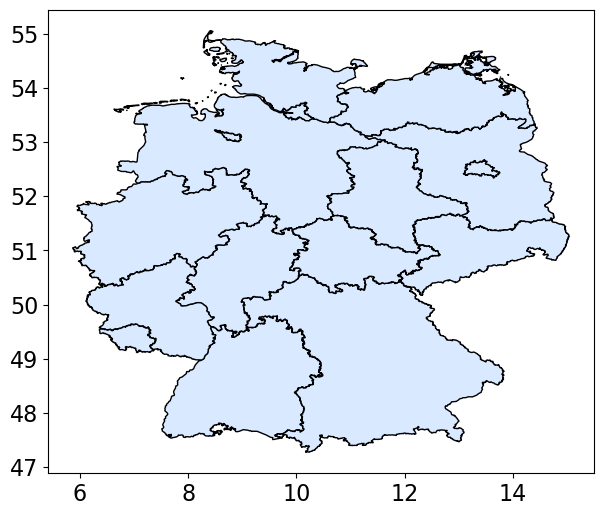

In [4]:
# draw all geoms
gk.geom.drawGeoms(federal_states_DE, figsize=(6, 6))

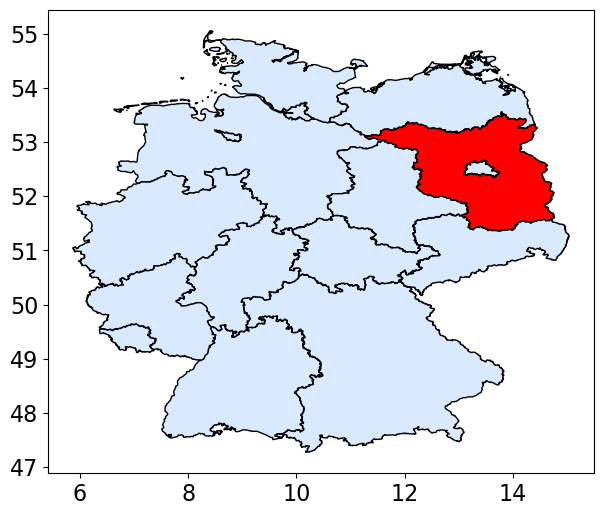

In [5]:
# highlight one geom
g2 = federal_states_DE.geom.iloc[3]
axh = gk.geom.drawGeoms(federal_states_DE, figsize=(6, 6))
gk.geom.drawGeoms(g2, ax=axh, figsize=(6, 6), fc="red")

plt.show()

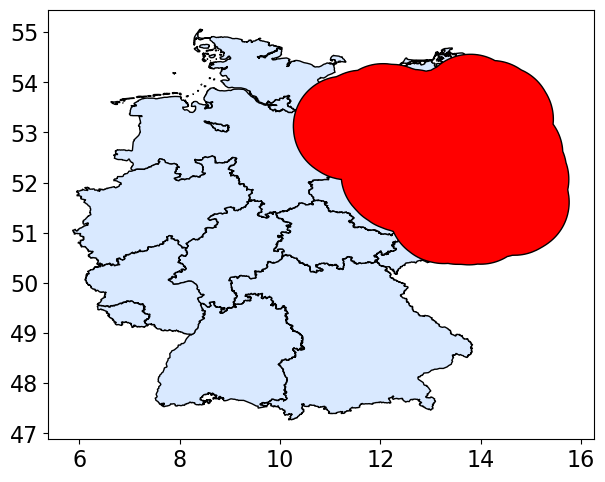

In [6]:
# use a buffer around the highlighted area with '.Buffer()'
g2 = federal_states_DE.geom.iloc[3].Buffer(1)
axh = gk.geom.drawGeoms(federal_states_DE, figsize=(6, 6))
gk.geom.drawGeoms(g2, ax=axh, figsize=(6, 6), fc="red")
plt.show()

## Export vector file 

In [7]:
# Simple vector creation
gk.vector.createVector(g2, output="example_file_df.shp")

'/storage/internal/home/c-winkler/Python/packages/geokit/geokit_dev/Examples/example_file_df.shp'

## Filtering spatially
Example: For a given point filter for the geom in which the point is located. Filter for the federal state which contains the city of Aachen.

In [8]:
# Point of Aachen
aachen_pt_real = gk.geom.point((6.083, 50.775), srs=gk.srs.EPSG4326)

# Filter for the federal state containing Aachen
federal_states_DE_df_geom_filtered = gk.vector.extractFeatures(
    gk._test_data_["gadm36_DEU_1.shp"], geom=aachen_pt_real
)
federal_states_DE_df_geom_filtered

,geom,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,"POLYGON ((8.05965614 50.69504166,8.0413866 50....",DEU,Germany,DEU.10_1,Nordrhein-Westfalen,North Rhine-Westphalia,None,Land,State,05,DE.NW


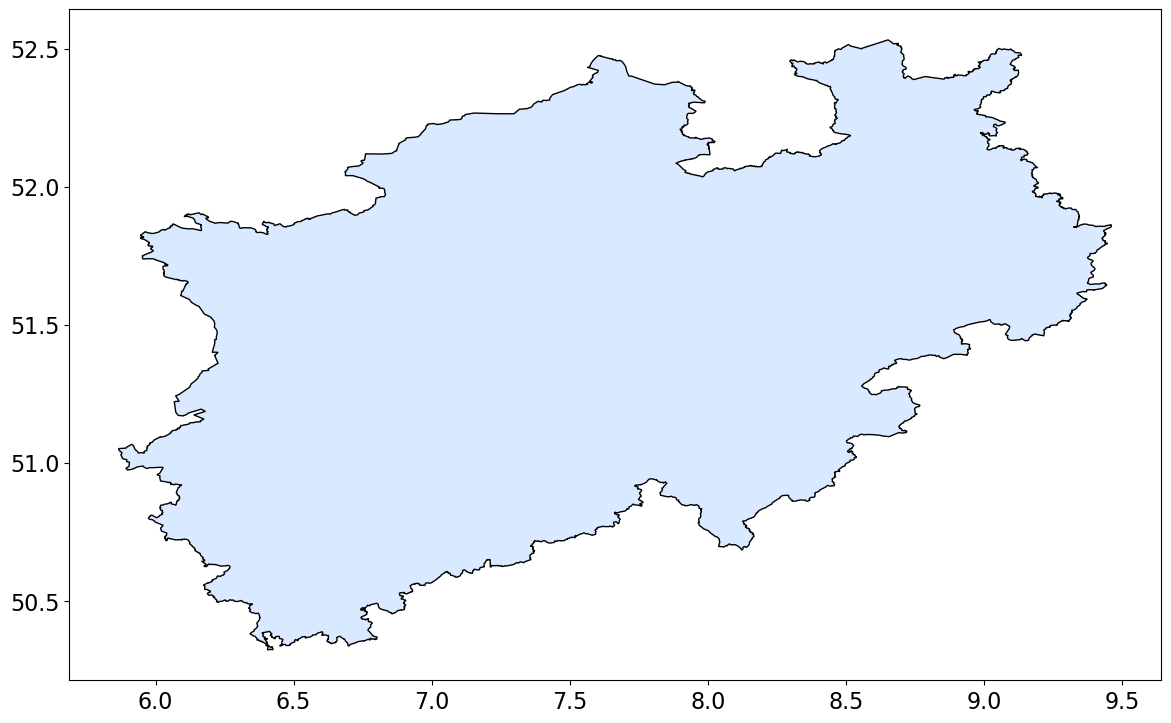

In [9]:
# Draw the federal state
gk.drawGeoms(federal_states_DE_df_geom_filtered)
plt.show()

## Filtering and clipping spatially
Example: Filter for the federal states which overlap with a random box polygon and clip the federal state gemetries to the shape of the input polygon.

In [10]:
# instead of the point of Aachen, let us define a random square box between 8-10° lon and 50-52° lat in the center of Germany
center_box = gk.geom.box((8, 50, 10, 52), srs=4326)

# now extract all "Bundeslaender" that overlap with this box AND clip their geometries to the box extent
# the parameter 'scaleAttrs' would allow to scale numeric attributes of the states linearly with area share (but we have none in the sample data)
federal_states_DE_df_geom_clipped = gk.vector.extractAndClipFeatures(
    gk._test_data_["gadm36_DEU_1.shp"], geom=center_box, scaleAttrs=None
)

# we get the expected federal states in the center of Germany
# also note the area share of each state area that is contained in the box, Hesse is nearly completely contained
federal_states_DE_df_geom_clipped

,geom,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,areaShare
0,"POLYGON ((9.04122543 50.00000763 0,9.03525352 ...",DEU,Germany,DEU.2_1,Bayern,Bavaria,None,Freistaat,None,09,DE.BY,0.025930
1,"POLYGON ((9.93442822 50.41932678 0,9.93427849 ...",DEU,Germany,DEU.7_1,Hessen,Hesse,None,Land,State,06,DE.HE,0.842050
2,"POLYGON ((9.99879646 51.40369415 0,9.99525547 ...",DEU,Germany,DEU.9_1,Niedersachsen,Lower Saxony,None,Land,State,03,DE.NI,0.052680
3,"POLYGON ((8.0413866 50.69665527 0,8.03969002 5...",DEU,Germany,DEU.10_1,Nordrhein-Westfalen,North Rhine-Westphalia,None,Land,State,05,DE.NW,0.254207
4,"MULTIPOLYGON (((8.00022984 50.75508118 0,8.001...",DEU,Germany,DEU.11_1,Rheinland-Pfalz,Rhineland-Palatinate,None,Land,State,07,DE.RP,0.016208
5,"MULTIPOLYGON (((9.99682236 50.67557526 0,9.996...",DEU,Germany,DEU.16_1,Thüringen,Thuringia,None,Freistaat,State,16,DE.TH,0.010095


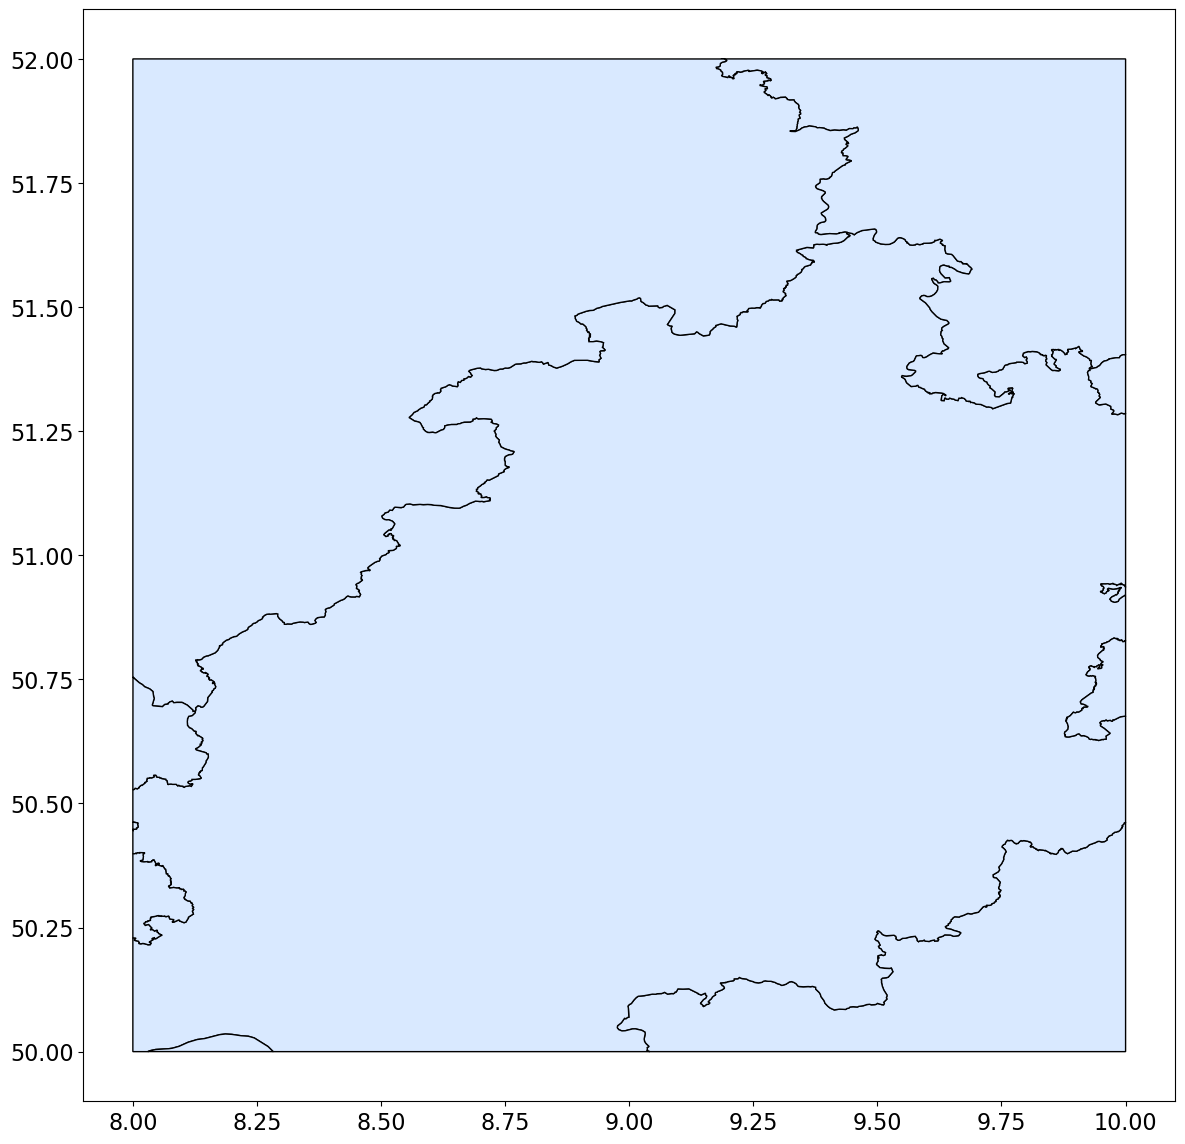

In [11]:
# plotting the results shows how the province geometries where clipped to our random box polygon shape
gk.drawGeoms(federal_states_DE_df_geom_clipped)
plt.show()

## Plot feature in region
Example: Get region from shape file and show feature. Get Aachen region and show wind turbine placements in this region.

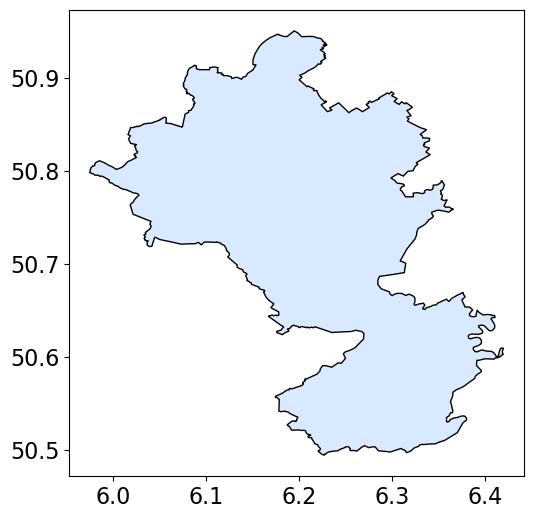

In [12]:
aachen_rm = gk.vector.extractFeatures(gk._test_data_["aachenShapefile.shp"])
gk.drawGeoms(aachen_rm, figsize=(5, 5), srs=4326)
plt.show()

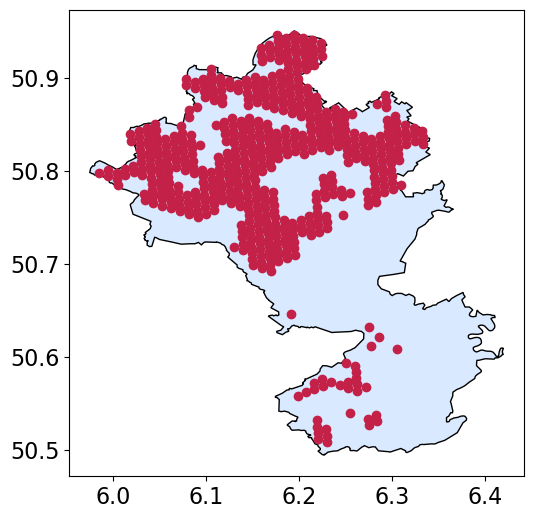

In [13]:
turbine_placements = gk.vector.extractFeatures(gk._test_data_["turbinePlacements.shp"])
axh = gk.drawGeoms(aachen_rm, figsize=(5, 5), srs=4326)
gk.drawGeoms(turbine_placements, ax=axh)
plt.show()

## Get information about the Vector file

Show information about a vector file.

In [14]:
# Vector info
vinfo = gk.vector.vectorInfo(gk._test_data_["gadm36_DEU_1.shp"])
print("COUNT", vinfo.count)
print("SRS", vinfo.srs)
print("ATTRIBUTES", vinfo.attributes)

COUNT 16
SRS GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AXIS["Latitude",NORTH],
    AXIS["Longitude",EAST],
    AUTHORITY["EPSG","4326"]]
ATTRIBUTES ['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'NL_NAME_1', 'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1']


Show information about points in a shape file.

In [15]:
# PD point series is okay
turbine_placements.geom

# numpy array
np.array([(pt.GetX(), pt.GetY()) for pt in turbine_placements.geom])

# LocationSet
location_set = gk.LocationSet(turbine_placements.geom)
print(location_set)

 , Lon      , Lat
0, 5.98520  , 50.79725 
1, 5.99469  , 50.79421 
2, 5.99411  , 50.80094 
3, 6.00475  , 50.78443 
4, 6.00417  , 50.79116 
...
554, 6.32384  , 50.83216 
555, 6.32331  , 50.83889 
556, 6.32278  , 50.84563 
557, 6.33332  , 50.82909 
558, 6.33279  , 50.83582 



Extract Feature and show information about the filtered data with '.attr'.

Example: Filter for the federal state which contains the city of Aachen and show the information.

In [16]:
aachen_pt_real = gk.geom.point((6.083, 50.775), srs=gk.srs.EPSG4326)
federal_states_DE_df_geom_filtered = gk.vector.extractFeature(
    gk._test_data_["gadm36_DEU_1.shp"], geom=aachen_pt_real
)
federal_states_DE_df_geom_filtered.attr

{'GID_0': 'DEU',
 'NAME_0': 'Germany',
 'GID_1': 'DEU.10_1',
 'NAME_1': 'Nordrhein-Westfalen',
 'VARNAME_1': 'North Rhine-Westphalia',
 'NL_NAME_1': None,
 'TYPE_1': 'Land',
 'ENGTYPE_1': 'State',
 'CC_1': '05',
 'HASC_1': 'DE.NW'}

## Making subregions
Making subregions with tileize. Deconstruct a given geometry into a set of tiled geometries.
Example for federal state Bavaria.

9


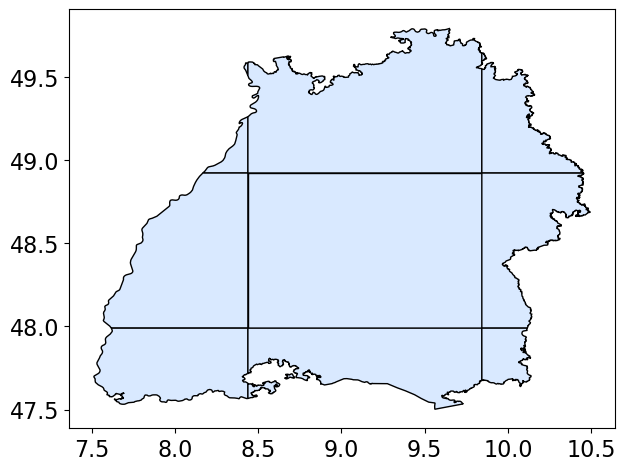

In [17]:
tiled_geoms = list(gk.geom.tileize(federal_states_DE.geom.iloc[0], zoom=8))
print(len(tiled_geoms))

gk.geom.drawGeoms(tiled_geoms, figsize=(6, 6))
plt.show()

# Or use https://mapshaper.org/

## Voronoi

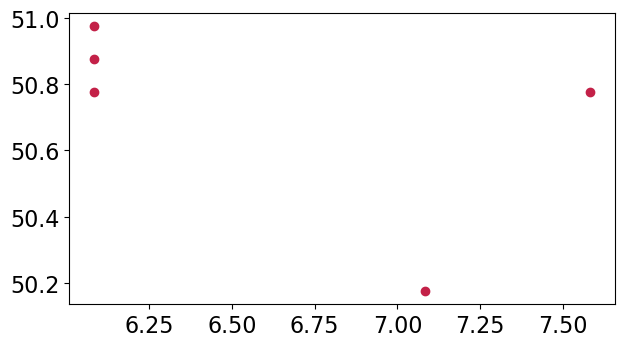

In [18]:
# Voronoi
aachen_centered_srs = gk.srs.centeredLAEA(6.083, 50.775)
aachen_points = [
    gk.geom.point(
        5.6086412456393614e-11, 1.0605099246605318e-09, srs=aachen_centered_srs
    ),
    gk.geom.point(5.5966859847770105e-11, 11124.48031893997, srs=aachen_centered_srs),
    gk.geom.point(5.584717712977507e-11, 22249.12252108337, srs=aachen_centered_srs),
    gk.geom.point(71432.80781956247, -66262.41755972906, srs=aachen_centered_srs),
    gk.geom.point(105796.52244980012, 1069.9939140476542, srs=aachen_centered_srs),
]


gk.geom.drawGeoms(aachen_points, figsize=(6, 6))
plt.show()

# Use function scipy.spatial.Voronoi

In [19]:
# Operating on geom column - Make new file with centroids
federal_states_DE_center_df = federal_states_DE.copy(deep=True)


def find_centroid(g):
    g2 = g.Centroid().Buffer(2)
    g2.AssignSpatialReference(g.GetSpatialReference())
    g2 = gk.geom.transform(g2, toSRS=gk.srs.EPSG3035)
    return g2


federal_states_DE_center_df.geom = federal_states_DE.geom.apply(find_centroid)
federal_states_DE_center_df

,geom,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,"POLYGON ((4398502.17663101 2825444.29747721,43...",DEU,Germany,DEU.1_1,Baden-Württemberg,None,None,Land,State,08,DE.BW
1,"POLYGON ((4571474.71024872 2876300.01040813,45...",DEU,Germany,DEU.2_1,Bayern,Bavaria,None,Freistaat,None,09,DE.BY
2,"POLYGON ((4687445.32670111 3279417.05473998,46...",DEU,Germany,DEU.3_1,Berlin,None,None,Land,State,11,DE.BE
3,"POLYGON ((4687406.62967122 3276216.21474307,46...",DEU,Germany,DEU.4_1,Brandenburg,None,None,Land,State,12,DE.BR
4,"POLYGON ((4370767.36023941 3343531.62977978,43...",DEU,Germany,DEU.5_1,Bremen,None,None,Freie Hansestadt,State,04,DE.HB
5,"POLYGON ((4454947.63911716 3383942.86010936,44...",DEU,Germany,DEU.6_1,Hamburg,None,None,Freie und Hansestadt,State,02,DE.HH
6,"POLYGON ((4393993.60615276 3055118.46532246,43...",DEU,Germany,DEU.7_1,Hessen,Hesse,None,Land,State,06,DE.HE
7,"POLYGON ((4621202.81347589 3414622.42247221,46...",DEU,Germany,DEU.8_1,Mecklenburg-Vorpommern,Mecklenburg-West Pomerania,None,Land,State,13,DE.MV
8,"POLYGON ((4399247.10847504 3295845.90234923,43...",DEU,Germany,DEU.9_1,Niedersachsen,Lower Saxony,None,Land,State,03,DE.NI
9,"POLYGON ((4290577.32178673 3152201.93412347,42...",DEU,Germany,DEU.10_1,Nordrhein-Westfalen,North Rhine-Westphalia,None,Land,State,05,DE.NW


In [20]:
# save this a new shapefile
gk.vector.createVector(federal_states_DE_center_df, output="example_centroid_df.shp")

'/storage/internal/home/c-winkler/Python/packages/geokit/geokit_dev/Examples/example_centroid_df.shp'

### DataFrame to Shapefile

Here a pandas dataframe is converted to a shape file. The dataframe can include any number of columns which contain float, interger, or string-representable values. One column must be called 'geom' which defines the geometries.


In [21]:
# Choose an srs for the geometries
srs = gk.srs.EPSG3035

# Create random point geometries
geoms = []
for i in range(200):
    geoms.append(gk.geom.point(np.random.random(2), srs=srs))

In [22]:
# Create a DataFrame with collumn called "geom" for the geometries
df = pd.DataFrame({"geom": geoms})

In [23]:
# Add Attributes for each geometry
size = np.random.randint(100, size=len(geoms))
df["size"] = size

color = [
    ["blue", "green", "red", "yellow"][i] for i in np.random.randint(4, size=len(geoms))
]
df["color"] = color

In [24]:
# Show the table for clarification
df.head()

,geom,size,color
0,POINT (0.8057656850059 0.011353649021707 0),50,blue
1,POINT (0.490977180171505 0.434269014972137 0),54,yellow
2,POINT (0.521765899401118 0.237738175183063 0),70,green
3,POINT (0.260401208439103 0.494542155718579 0),25,yellow
4,POINT (0.667251186319504 0.989181100065715 0),68,red


In [25]:
# Save as a shapefile
gk.vector.createVector(df, output="outputShapeFile.shp")

'/storage/internal/home/c-winkler/Python/packages/geokit/geokit_dev/Examples/outputShapeFile.shp'

### Dataframe to Geopackage

Similarly, pandas DataFrames containing geometry objects can also be saved to geopackages containing multiple layers of geometries.

In [26]:
# Choose an srs for the geometries
srs = gk.srs.EPSG3035

# Create random point geometries
geoms = []
for i in range(200):
    geoms.append(gk.geom.point(np.random.random(2), srs=srs))

In [27]:
# Create two DataFrames with collumn called "geom" for the geometries
df_1 = pd.DataFrame({"geom": geoms[:100]})
df_2 = pd.DataFrame({"geom": geoms[100:]})

In [28]:
# Add Attributes for each geometry
size = np.random.randint(50, size=int(len(geoms) / 2))
df_1["size"] = size
df_2["size"] = size

color = [
    ["blue", "green", "red", "yellow"][i]
    for i in np.random.randint(4, size=int(len(geoms) / 2))
]
df_1["color"] = color
df_2["color"] = color

In [29]:
df_1.head()

,geom,size,color
0,POINT (0.157951965463824 0.892680845572919 0),39,green
1,POINT (0.164058968466453 0.50463264791745 0),6,yellow
2,POINT (0.023772071378047 0.267115483619039 0),10,yellow
3,POINT (0.506936698670426 0.040470046024073 0),8,yellow
4,POINT (0.380670447091158 0.930788833400302 0),46,yellow


In [30]:
df_2.head()

,geom,size,color
0,POINT (0.265682450891942 0.686580534606101 0),39,green
1,POINT (0.933661367414669 0.805157456735568 0),6,yellow
2,POINT (0.31671537813692 0.144426795867236 0),10,yellow
3,POINT (0.031707360628645 0.395140700338608 0),8,yellow
4,POINT (0.229364121948998 0.122049215419284 0),46,yellow


In [31]:
# Save the first DataFrame to a geopackage
gk.vector.createVector(
    df_1, output="outputGeoPackage.gpkg", driverName="GPKG", layerName="layer1"
)

# Save the second DataFrame to the same geopackage without overwriting the first layer
gk.vector.createVector(
    df_1,
    output="outputGeoPackage.gpkg",
    driverName="GPKG",
    layerName="layer2",
    overwrite=False,
)

/storage/internal/home/c-winkler/Python/packages/geokit/geokit_dev/geokit/core/vector.py:883: UserWarning: Overwriting existing file
  warnings.warn("Overwriting existing file")


'outputGeoPackage.gpkg'

In [32]:
# Read from the saved geopackage

# Check the layer names
gk.vector.listLayers("outputGeoPackage.gpkg")

['layer1', 'layer2']

In [33]:
# Extract the features from the geopackage

df_1 = gk.vector.extractFeatures("outputGeoPackage.gpkg", layerName="layer1")
df_2 = gk.vector.extractFeatures("outputGeoPackage.gpkg", layerName="layer2")

In [34]:
df_1.head()

,geom,size,color
0,POINT (0.157951965463824 0.892680845572919 0),39,green
1,POINT (0.164058968466453 0.50463264791745 0),6,yellow
2,POINT (0.023772071378047 0.267115483619039 0),10,yellow
3,POINT (0.506936698670426 0.040470046024073 0),8,yellow
4,POINT (0.380670447091158 0.930788833400302 0),46,yellow


In [35]:
df_2.head()

,geom,size,color
0,POINT (0.157951965463824 0.892680845572919 0),39,green
1,POINT (0.164058968466453 0.50463264791745 0),6,yellow
2,POINT (0.023772071378047 0.267115483619039 0),10,yellow
3,POINT (0.506936698670426 0.040470046024073 0),8,yellow
4,POINT (0.380670447091158 0.930788833400302 0),46,yellow
